In [69]:
# Importacao de pacotes
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numba import jit

np.seterr(divide = 'ignore', invalid = 'ignore'); # ignora warnings sobre divisao por zero (no calculo da probabilidade de flipar os spins para T = 0)

In [70]:
@jit
def metropolis(N, Nvarr, T, J = 1, h = 0, kB = 1):
    spins = np.random.choice([-1, +1], (N, Nvarr)) # gera uma configuracao aleatoria de spins
    
    # Faz Nvarr varreduras sobre o grid
    for n in range(Nvarr):
        # Ordem aleatoria para varrer os spins do grid
        ordem = np.random.permutation(N)
        
        # Varredura sobre os spins e evolucao (flips aleatorios) devido a temperatura
        for i in ordem:
            # Calculo da energia para flipar o spin na posicao i
            Eflip = 2*spins[i, n]*(J*(spins[(i - 1)%N, n] + spins[(i + 1)%N, n]) + h)

            # Se Eflip < 0, flipa o spin; caso contrario, aplica-se o passo de Monte Carlo
            if Eflip < 0:
                spins[i, n] = - spins[i, n]
            else:
                Pflip = np.exp(- Eflip/(kB*T)) # probabilidade de flipar o spin na posicao i
                if np.random.random() < Pflip:
                    spins[i, n] = - spins[i, n]
    return spins

In [123]:
# Inicializacao das variaveis da simulacao
N = 100 # tamanho do grid de spins
Nvarr = int(1e3) # numero de varreduras
J = 0 # constante de interacao entre os spins
h = 1 # constante de interacao do spin com o campo magnetico externo
kB = 1 # constante de Boltzmann

Tmin = 0 # temperatura minima (bem proxima de zero)
Tmax = 15 # temperatura maxima
DeltaT = 1 # passo das temperaturas
vecT = np.arange(Tmin, Tmax + DeltaT, DeltaT) # vetor de temperaturas
NT = len(vecT) # tamanho do vetor de temperaturas
Beta = 1/(kB*vecT) # vetor de temperatura inversa

spinsm = np.zeros((N, NT)) # vetor da media dos spins para as Nvarr varreduras de cada temperatura

In [124]:
# Simulacao para cada temperatura
for k in range(NT):
    T = vecT[k] # obtem a temperatura
    spins = metropolis(N, Nvarr, T, J, h, kB) # simula a configuracao de spins (Nvarr vezes)
    spinsm[:, k] = spins.mean(axis = 1)

# Calcula a media das varreduras para todas as temperaturas (axis 0)
mm = spinsm.mean(axis = 0)
mstd = spinsm.std(axis = 0)

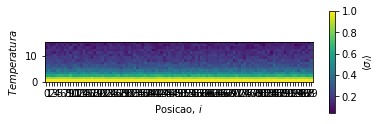

In [125]:
# Média dos spins de cada elemento para cada temperatura
plt.imshow(spinsm.T, origin = 'lower', extent = [0, N, Tmin, Tmax])
plt.xlabel(r'Posicao, $i$')
plt.xticks(np.arange(0.5, N, 1.0), np.arange(0, N))
plt.ylabel(r'$Temperatura$')
plt.colorbar(shrink = 0.47, label = r'$\langle \sigma_i \rangle$')
plt.show()

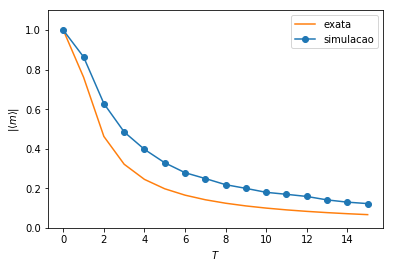

In [127]:
# Magnetizacao media para cada temperatura
plt.errorbar(vecT, np.abs(mm), fmt = '-o', label = 'simulacao')

# Resultado analitico
mexact = np.sinh(Beta*h)/np.sqrt(np.sinh(Beta*h)**2 + np.exp(- 4*Beta*J))
mexact[mexact != mexact] = 1 # corrige os valores nan (inf/inf -> 1)
plt.plot(vecT, mexact, label = 'exata')

plt.xlabel('$T$')
plt.ylabel(r'$|\langle m \rangle|$')
plt.ylim(0, 1.1)
plt.legend()
plt.show()